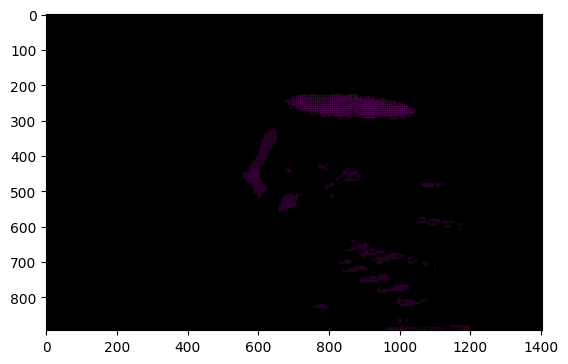

In [78]:


import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image, ImageDraw, ImageFont
import numpy as np


img=Image.open(r'C:\Users\sinju\Documents\Lkink_bot\t11.png').convert('L')


# resize image to nth of its size
orig_width,orig_height=img.size
resize_factor = 4 #this kinda deals with resolution of image (Smaller this larger the image)
new_width, new_height = orig_width // resize_factor, orig_height // resize_factor
scaled = transforms.Compose([
    transforms.Resize((new_height, new_width)),  # Resize to new size (remeber height,width)
])

transformed_img = scaled(img)

# get the luminance of the image by normalize betwn 0 to 1 then multiply by the number of lenth of ascci charcters

luminance=np.array(transformed_img)
luminance=luminance # Inverse the color of image as it reads in opposite for dark and light
luminance=luminance/255
luminance = np.round(luminance, decimals=3)

ascii_char = [' ','c', ';', 'c', '.', 'P', 'O', '&', '%', '@'] # ascii characters changuing them can cause better iomage try it
relate = {i: x for i, x in enumerate(ascii_char)}

luminance_betwn_ten = (luminance*(len(ascii_char)-1) ).astype(int)


# exchange the value in pixel to dict it represents to respectively
char_img = np.vectorize(relate.get)(luminance_betwn_ten)

n_size=6 # This deals with the size we will use to represent the character like bigger this number smaller the char will have better resolution
# The resolution scalles up with this value and the character has same size so it will be smaller better looking so wont blend and 
# think as resolution up size of chat constant so seems like char size decreased but in actuality resolution of img increased
# Can be thought as brightnes some times lol
char_width, char_height = n_size,n_size  # Size of each character block (can be adjusted) higher this larget the time

img_output = Image.new('RGB', (new_width * char_width, new_height * char_height), color='black')
draw = ImageDraw.Draw(img_output)


font = ImageFont.load_default()  # load font

# Draw each character on the blank image
for i in range(new_height):
    for j in range(new_width):
        char = char_img[i, j]
        draw.text((j * char_width, i * char_height), char, fill='purple', font=font) # place char on img

plt.imshow(img_output)
img_output.save('tes.png')

In [46]:

import cv2 as cv
window_name = ('Sobel Demo - Simple Edge Detector')
scale = 1
delta = 0
ddepth = cv.CV_64F

img=255-cv.imread(r'C:\Users\sinju\Documents\Lkink_bot\test.png')
gray=cv.GaussianBlur(img, (3, 3), 0)
gray=cv.cvtColor(gray, cv.COLOR_BGR2GRAY)

grad_x = cv.Sobel(gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
grad_y = cv.Sobel(gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
    
    
abs_grad_x = cv.convertScaleAbs(grad_x)
abs_grad_y = cv.convertScaleAbs(grad_y)

    
grad = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

In [38]:
grad.max()

np.uint8(255)

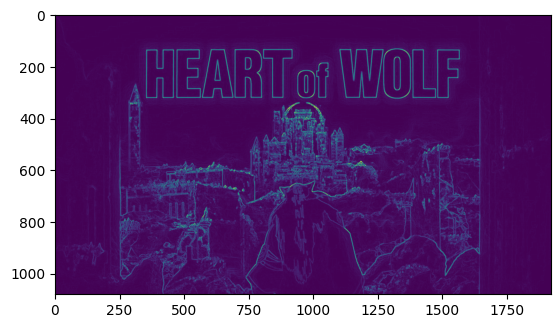

In [47]:
plt.imshow(grad)


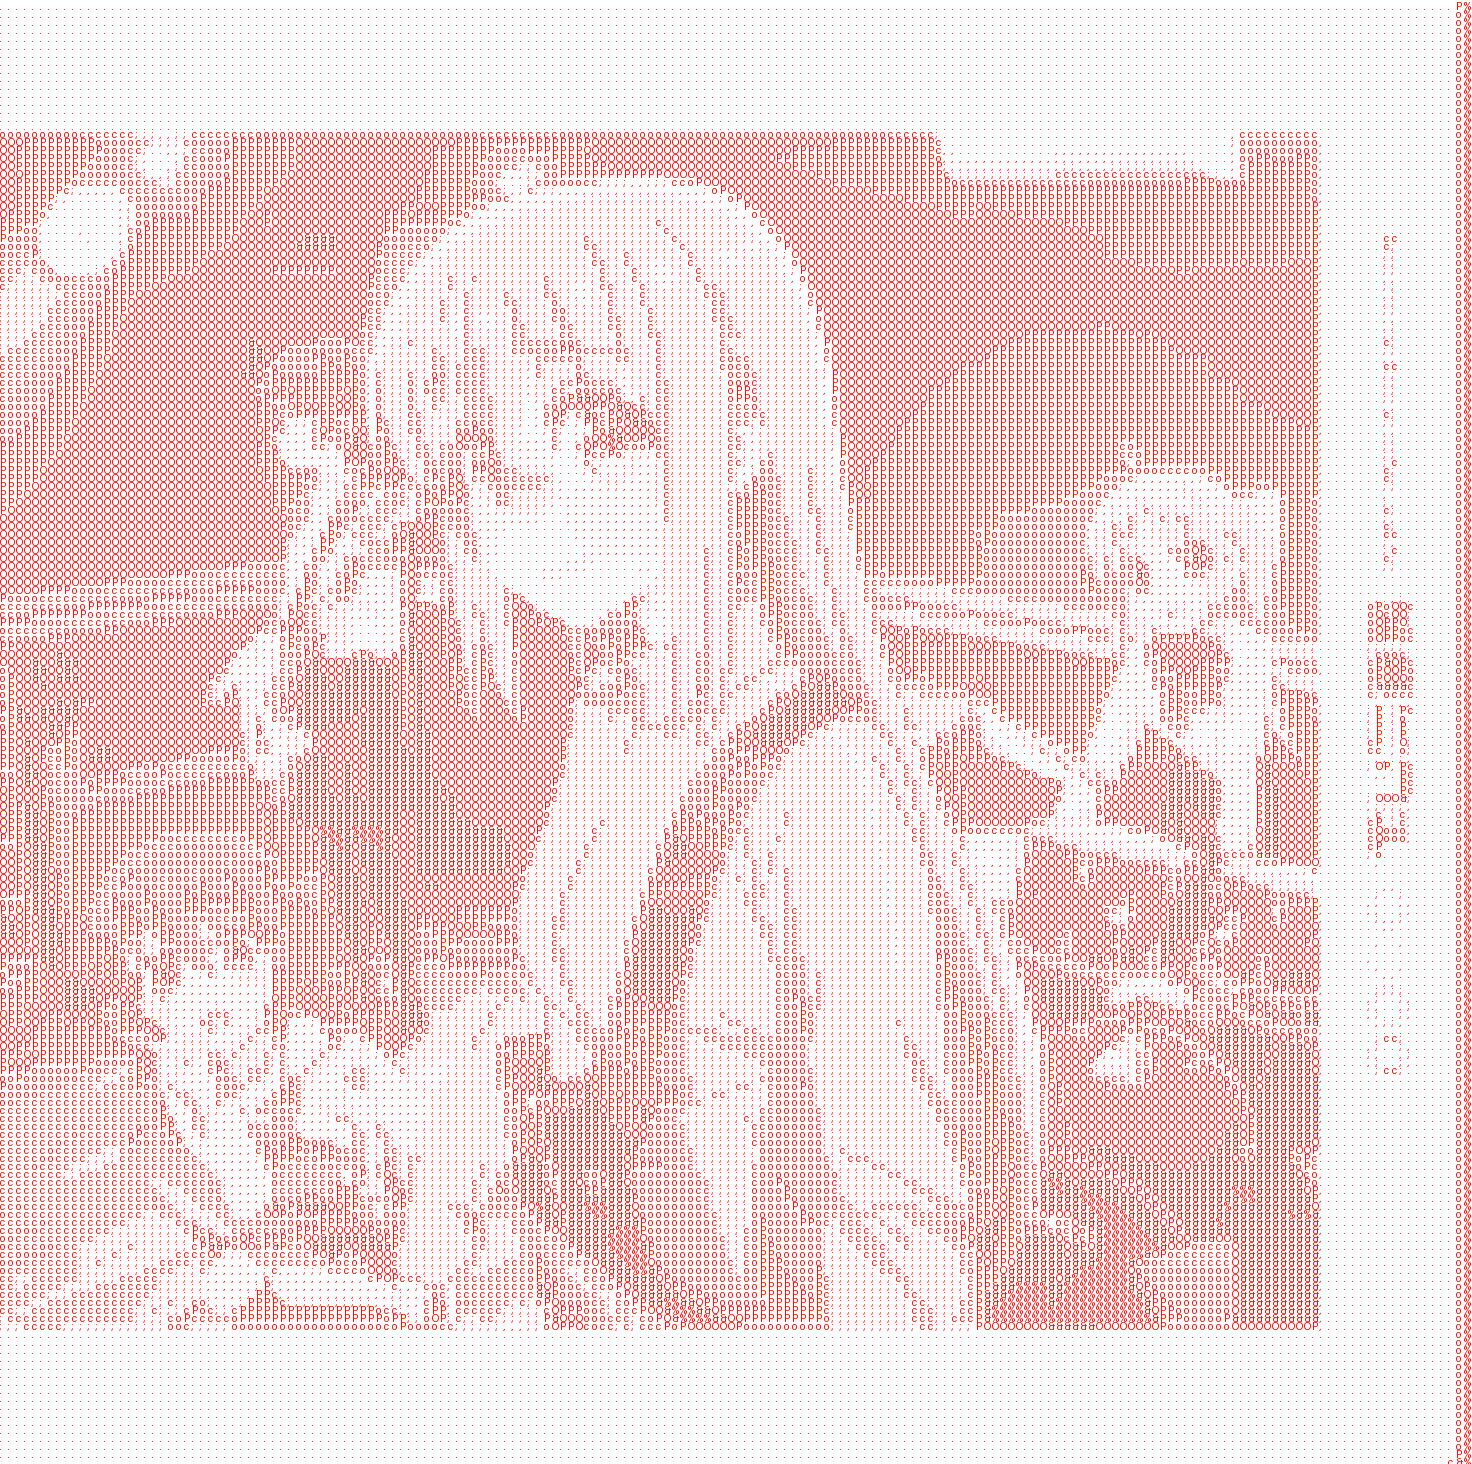

In [14]:
img_output

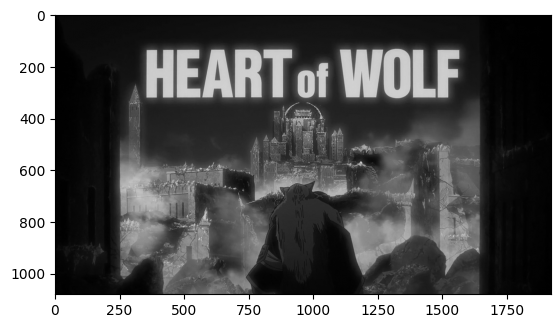

In [22]:
img=Image.open(r'C:\Users\sinju\Documents\Lkink_bot\test.png').convert('L')
plt.imshow(img,cmap='gray')

In [ ]:
sobelfilter